In [1]:
import pandas as pd
import os
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

import seaborn as sns

In [ ]:
# grab the data
data_dir = '../Data_extraction/'
csv_file = 'extracted_data_v1.csv'
filepath = os.path.join(data_dir, csv_file)
df = pd.read_csv(filepath)
df

,coal,electricity,natural gas,wood,private,public,walk/bicycle,diesel,electric,hybrid,lpg,petrol,Vehicle Monthly Distance Km,Frequency of Traveling by Air,extra large waste bag,large waste bag,medium waste bag,small waste bag,Waste Bag Weekly Count,CarbonEmission
0,1,0,0,0,0,1,0,0,0,0,0,0,210,2,0,1,0,0,4,2238
1,0,0,1,0,0,0,1,0,0,0,0,0,9,1,1,0,0,0,3,1892
2,0,0,0,1,1,0,0,0,0,0,0,1,2472,0,0,0,0,1,1,2595
3,0,0,0,1,0,0,1,0,0,0,0,0,74,1,0,0,1,0,3,1074
4,1,0,0,0,1,0,0,1,0,0,0,0,8457,3,0,1,0,0,1,4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,0,0,0,0,1,0,0,268,0,0,0,1,0,5,2408
9996,1,0,0,0,1,0,0,0,0,0,1,0,5316,2,1,0,0,0,3,3084
9997,0,1,0,0,0,0,1,0,0,0,0,0,96,3,1,0,0,0,5,2377
9998,1,0,0,0,1,0,0,0,0,0,0,1,8688,1,0,0,1,0,5,4574


In [ ]:
# shuffle the data
dataset = np.asarray(df, dtype='int32')
np.random.seed(0)
np.random.shuffle(dataset)

In [ ]:
# select the features
features = dataset[:,:-1]
features.shape

(10000, 19)

In [ ]:
# select the labels
labels = dataset[:,-1].reshape((len(dataset),-1))
labels.shape

(10000, 1)

In [ ]:
# split into training and test sets
train_features = features[:8000]
train_labels = labels[:8000]
test_features = features[8000:]
test_labels = labels[8000:]

In [7]:
# fit linear regression
model = linear_model.LinearRegression()
model.fit(train_features, train_labels)
predictions = model.predict(test_features)
mae = mean_absolute_error(predictions, test_labels)
mae

368.0819415538433

[Text(0.5, 0, 'Actual Emissions'), Text(0, 0.5, 'Predicted Emissions')]

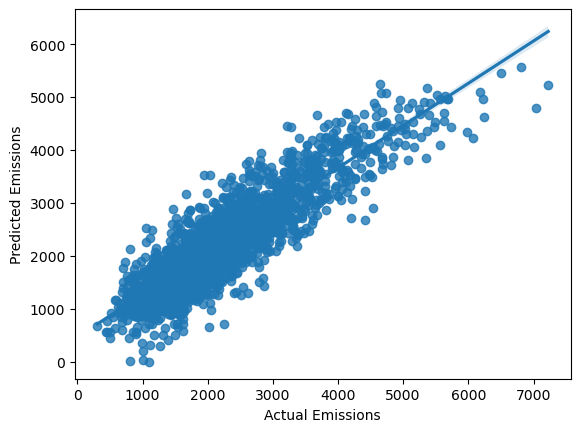

In [ ]:
# compare predictions and actual labels
ax = sns.regplot(x=test_labels, y=predictions)
ax.set(xlabel='Actual Emissions', ylabel='Predicted Emissions')

In [9]:
# baseline predictor (predict mean)
naive_predictions = np.full(test_labels.shape, np.mean(train_labels))
mae_naive = mean_absolute_error(naive_predictions, test_labels)
mae_naive

794.8747605000001

In [ ]:
# get model parameters
columns = list(df.columns)
coefficients = model.coef_
coefficients = np.abs(coefficients)

In [ ]:
# encode waste bag volume 
# waste bag sizes by gallons
S = 6
M = 12
L = 18
XL = 36
volumes = [XL, L, M, S]

columns = ['extra large waste bag', 'large waste bag', 'medium waste bag', 'small waste bag']
waste_per_week = df[columns].dot(volumes) * df['Waste Bag Weekly Count']
df_waste = pd.read_csv(filepath)
df_waste = df_waste.drop(columns, axis=1)
df_waste = df_waste.drop('Waste Bag Weekly Count', axis=1) 
df_waste.insert(loc=len(df_waste.columns)-1, column='Waste Per Week', value=waste_per_week)
df_waste

,coal,electricity,natural gas,wood,private,public,walk/bicycle,diesel,electric,hybrid,lpg,petrol,Vehicle Monthly Distance Km,Frequency of Traveling by Air,Waste Per Week,CarbonEmission
0,1,0,0,0,0,1,0,0,0,0,0,0,210,2,72,2238
1,0,0,1,0,0,0,1,0,0,0,0,0,9,1,108,1892
2,0,0,0,1,1,0,0,0,0,0,0,1,2472,0,6,2595
3,0,0,0,1,0,0,1,0,0,0,0,0,74,1,36,1074
4,1,0,0,0,1,0,0,1,0,0,0,0,8457,3,18,4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,0,0,0,0,1,0,0,268,0,60,2408
9996,1,0,0,0,1,0,0,0,0,0,1,0,5316,2,108,3084
9997,0,1,0,0,0,0,1,0,0,0,0,0,96,3,180,2377
9998,1,0,0,0,1,0,0,0,0,0,0,1,8688,1,60,4574


In [ ]:
# performance results from encoding waste volume
dataset = np.asarray(df_waste, dtype='int32')
np.random.seed(0)
np.random.shuffle(dataset)

features = dataset[:,:-1]
labels = dataset[:,-1].reshape((len(dataset),-1))

train_features = features[:8000]
train_labels = labels[:8000]
test_features = features[8000:]
test_labels = labels[8000:]

smaller_model = linear_model.Lasso()
smaller_model.fit(train_features, train_labels)
predictions = smaller_model.predict(test_features)

mae_waste = mean_absolute_error(predictions, test_labels)
mae_waste

367.4145650606538